# Heavy Traffic Indicators on I-94

This project will look at data collected about westbound traffic flow on I-94 (Minneapolis to Saint Paul).The main goal of this project is to find a few indicators of heavy traffic. Influences may be weather, time of year, time of day, or day of the week.

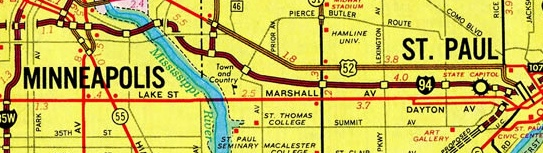

There are 9 columns and over 48,000 rows of data. The data was collected from October 2012, to September 2018. Data was taken at a station located approximately half way between Minneapolis and Saint Paul so our analysis will only focus on this area, not I_94 as a whole (which is over 900 miles long).

__Data Dictionary:__
* ***holiday***=US national holidays as well as regional holidays (Minnesota State Fair)(type=categorical)
* ***temp***=average temperature in Kelvin
* ***rain_1h***=(mm) amount of rain that occurred in the hour
* ***snow_1h***=(mm) amount of snow that occurred in the hour
* ***clouds_all***=percentage of cloud cover(type=integer)
* ***weather_main***=short textual description of current weather(type=categorical)
* ***weather_description***=longer textual description of current weather(type=categorical)
* ***date_time***=hour of data collected local CST time(type=date)
* ***traffic_volume***=hourly I-94 ATR 301 reported westbound traffic volume(type=integer)

## Exploring the Data

In [2]:
# Import pandas and read in file
import pandas as pd
interstate=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# First 5 rows
print(interstate.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
# Last 5 rows
print(interstate.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [4]:
# Data info
print(interstate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


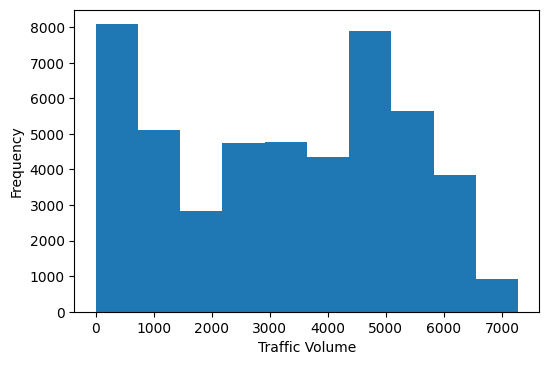

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [12]:
# Import matplotlib so we can generate visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Histogram on traffic_volume column
plt.plot()
plt.hist(interstate['traffic_volume'])
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.show()

print(interstate['traffic_volume'].describe())

The above histogram and series.describe() show that about 25% of the time there are 1,193 or fewer cars on the road, probably during the night. About 75% of the time there were 4,933 or fewer cars on the road leaving the final 25% of time the volume exceeded 4,933. Time of day (day vs. night) may have an influence on these numbers. Let's take a closer look.

## Traffic Volume: Day vs. Night
First we will divide the dataset into two parts, day (7:00AM-7:00PM) and night(7:00PM-7:00AM)

In [17]:
# To make it easier to graph, convert date_time column to datetime

interstate['date_time']=pd.to_datetime(interstate['date_time'])

# Separate the day and and night hours
day = interstate.copy()[(interstate['date_time'].dt.hour >= 7) & (interstate['date_time'].dt.hour  < 19)]

night = interstate.copy()[(interstate['date_time'].dt.hour >= 19) | (interstate['date_time'].dt.hour < 7)]

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


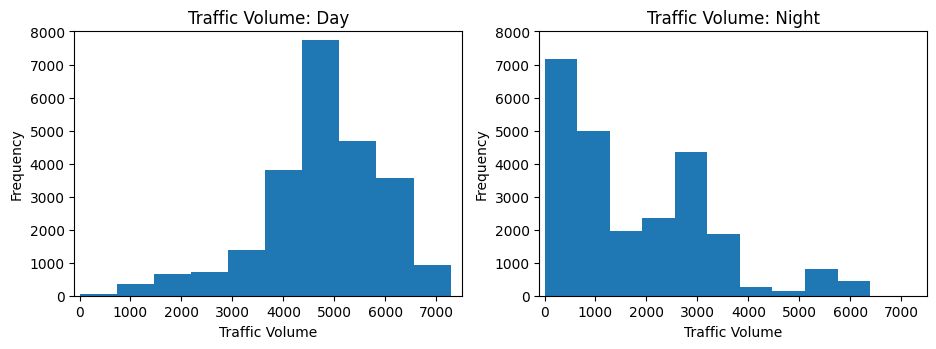

Day
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Night
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [23]:
# Create separate histograms to compare day and night
plt.figure(figsize = (11, 3.5))

# Day
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

# Night
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

print('Day')
print(day['traffic_volume'].describe())
print('\n')
print('Night')
print(night['traffic_volume'].describe())

The traffic volume distribution by day is left/negative skewed which means that most of the volume is high. We can see that 25% of the time there are at least 4252 cars on the road.


The night traffic volume distribution is right/positive skewed. whiiich means most of the volume is low. Whereas 25% quartile was 4252, 25% of the time durinig the night there are less than 530 cars on the road. 

Since traffic at night is generally much lighter than during the day, we will focus solely on the day data.

## Time Indicators
The first indicator we will look at is time and we are fortunate that the dataset provides us with information that will allow us to compare months, days of the week, and times of day.

### Month

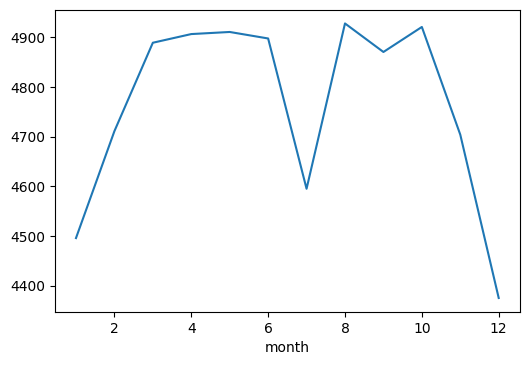

In [26]:
# Find average traffic volume(day) by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

This is a very telling line graph. The winter months show a steep decline in traffic volume whereare as the spring and fall show a steep incline in traffic. Interestingly, there is a decline in traffic volume in the month of July.

Questions going forward: is July a low volume month every year? Is it the whole month of July or a certain day or week? What could cause such a significant drop in  traffic volume during a normally high-volume stretch of the year?

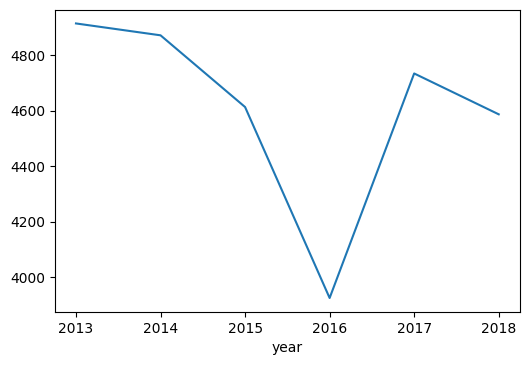

In [27]:
# Is July a low volume month every year?

day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

July is typically a high-volume month which means something affected the traffic volume in July of 2016. After a Google search it looks like there was road construction during July, 2016 so this could explain the steep decline in traffic volume. __[see article here](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)__

### Day of the Week

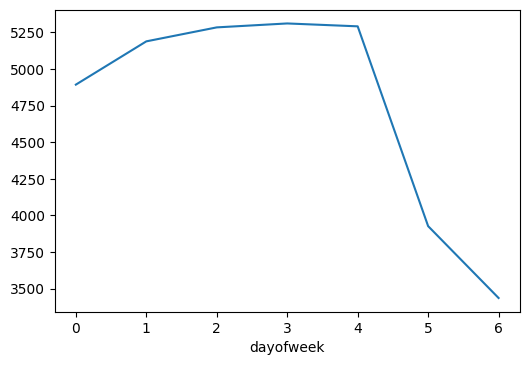

In [31]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

## 0 is Monday

This graph shows how traffic is much higher during the week and slows significantly on weekends. It probably changes on holiday weekends but overall, traffic is highest during the week when people are commuting for work.

### Time of Day
This section will split business days and weekends into separate graphs since there is such a difference between the two and the weekend days would pull down the average.

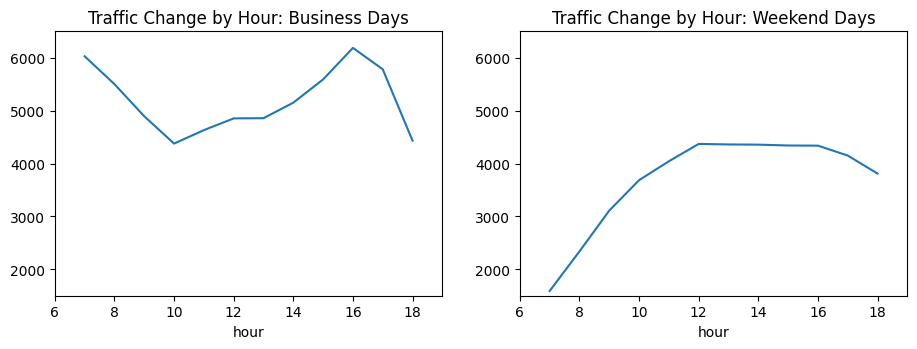

In [40]:
# Extract 'hour' from date_time column
day['hour']=day['date_time'].dt.hour

# Separate business and weekend days
business_days = day.copy()[day['dayofweek'] <= 4] ## Monday-Friday
weekend = day.copy()[day['dayofweek']>=5] ##Saturday/Sunday

# By hour
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 19)
plt.ylim(1500, 6500)
plt.title('Traffic Change by Hour: Business Days')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 19)
plt.ylim(1500, 6500)
plt.title('Traffic Change by Hour: Weekend Days')

plt.show()



During the week, traffic is highest first thing in the morning and then again at about 4:00PM (16). These times coincide with when people are commuting for work.

On the weekends, traffic is very light in the mornings and then peaks at about noon and tapers off after 4:00PM (16). Perhaps people are sleeping in on the weekends and don't get moving around until later in the morning and then they are trying to do other things at night rather than driving around.

### Summary of Time Indicators
* Traffic is higher in the warmer months (March-October) as opposed to colder months (November-February).
* Traffic is much higher during the week than it is on weekends.
* The busiest times of day are 7:00AM and 4:00PM on business days.

## Weather Indicators
First we will look at the numerical columns and see  if the weather columns have any correlation to the traffic_volume column.

In [41]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation to traffic volume so let's generate a scatter plot to visualize this correlation.

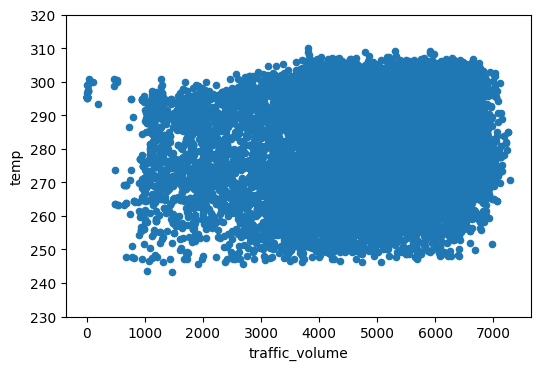

In [42]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

We can conclude that temperature is not a solid indicator for traffic volume because we don't see any type of growth.

Next we will look at the weather_description column to see if that will give us some clear indicators.

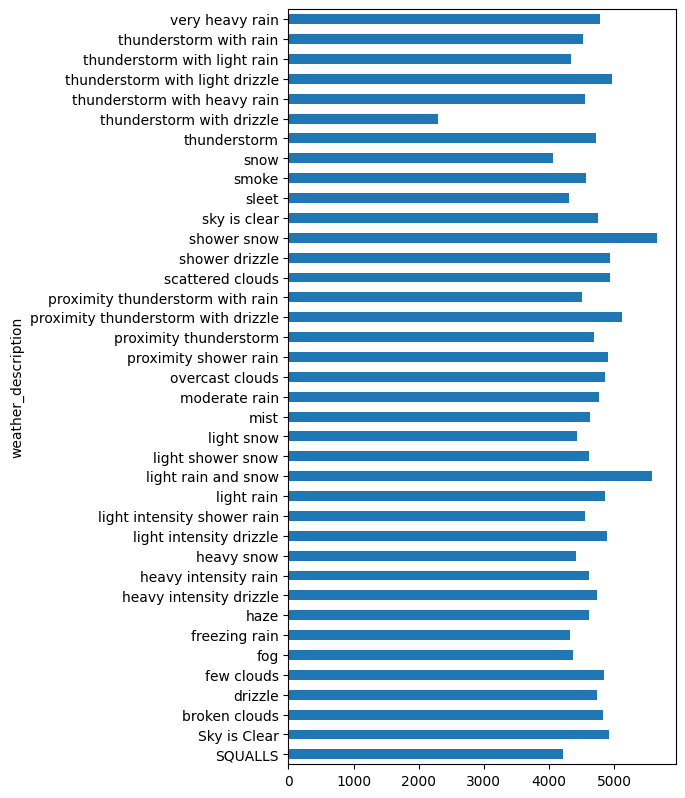

In [46]:
by_weather_description  = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize  = (5, 10))
plt.show()

It looks like there are 3 weather types where traffic volume is over 5000:
* shower snow
* light rain and snow
* proximity thunderstorm with drizzle
Initially, you would think that bad weather would mean there would be less traffic on the road but perhaps when the weather is bad but not terrible, people aren't commuting by public transport or biking.

# Conclusion
This project aimed to look at data about traffic volume on the I-94 and see what might indicate high traffic volume.

Time Indicators
* Traffic is higher in the warmer months (March-October) as opposed to colder months (November-February).
* Traffic is much higher during the week than it is on weekends.
* The busiest times of day are 7:00AM and 4:00PM on business days.

Weather Indicators
* shower snow
* light rain and snow
* proximity thunderstorm with drizzle
